In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.graphics.regressionplots as smg

In [8]:
toyota = pd.read_csv("MLR.csv")
toyota

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [9]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [10]:
toyota.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [11]:
toyota.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [12]:
toyota.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [13]:
toyota.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [14]:
toyota = pd.get_dummies(toyota, columns=['Fuel_Type'], drop_first=True)


In [15]:
toyota.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618,0.025495,-0.027589
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000,0.568087,-0.560470


In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota)


In [ ]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Cylinders+Weight',data=toyota).fit()

In [ ]:
model.params

In [19]:
model.tvalues , np.round(model.pvalues,5)

(Intercept    -5.395759
 Age_08_04   -46.725228
 KM          -16.344309
 HP           10.878217
 cc           -0.982650
 Doors        -0.266951
 Gears         3.142596
 Cylinders    -5.395759
 Weight       21.781234
 dtype: float64,
 Intercept    0.00000
 Age_08_04    0.00000
 KM           0.00000
 HP           0.00000
 cc           0.32595
 Doors        0.78955
 Gears        0.00171
 Cylinders    0.00000
 Weight       0.00000
 dtype: float64)

In [20]:
model.rsquared , model.rsquared_adj

(0.8628951602234526, 0.8622230776755283)

In [21]:
slr_c=smf.ols('Price~cc',data=toyota).fit()
slr_c.tvalues , slr_c.pvalues 

(Intercept    24.694090
 cc            4.824822
 dtype: float64,
 Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64)

In [22]:
mlr_cd=smf.ols('Price~cc+Doors',data=toyota).fit()
mlr_cd.tvalues , mlr_cd.pvalues 

(Intercept    12.620704
 cc            4.340400
 Doors         6.816153
 dtype: float64,
 Intercept    1.056885e-34
 cc           1.521992e-05
 Doors        1.373469e-11
 dtype: float64)

In [23]:
rsq_age=smf.ols(' Age_08_04~KM+HP+cc+Doors+Gears+Cylinders+Weight',data=toyota).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~ Age_08_04+HP+cc+Doors+Gears+Cylinders+Weight',data=toyota).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~ Age_08_04+KM+cc+Doors+Gears+Cylinders+Weight',data=toyota).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_cc=smf.ols('cc~ Age_08_04+KM+HP+Doors+Gears+Cylinders+Weight',data=toyota).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_DR=smf.ols('Doors~ Age_08_04+KM+HP+cc+Gears+Cylinders+Weight',data=toyota).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~ Age_08_04+KM+HP+cc+Doors+Cylinders+Weight',data=toyota).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_CL=smf.ols('Cylinders~ Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=toyota).fit().rsquared
vif_CL=1/(1-rsq_CL)

rsq_WT=smf.ols('Weight~ Age_08_04+KM+HP+cc+Doors+Gears+Cylinders',data=toyota).fit().rsquared
vif_WT=1/(1-rsq_WT)

d1={'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Cylinders','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_cc,vif_DR,vif_GR,vif_CL,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

C:\Users\kavya\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Variables,Vif
0,Age_08_04,1.874559
1,KM,1.645618
2,HP,1.218056
3,cc,1.146729
4,Doors,1.150044
5,Gears,1.096603
6,Cylinders,0.000000
7,Weight,1.643962


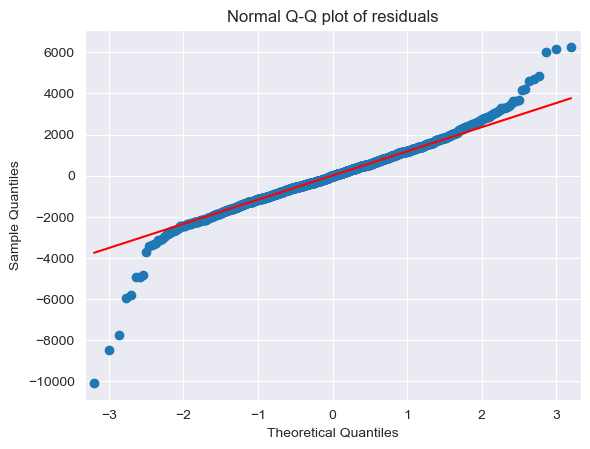

In [24]:
sm.qqplot(model.resid,line='q')  
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [25]:
list(np.where(model.resid>6000))

[array([109, 147, 523], dtype=int64)]

In [26]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

In [27]:
def standard_values(vals) : return (vals-vals.mean())/vals.std() 

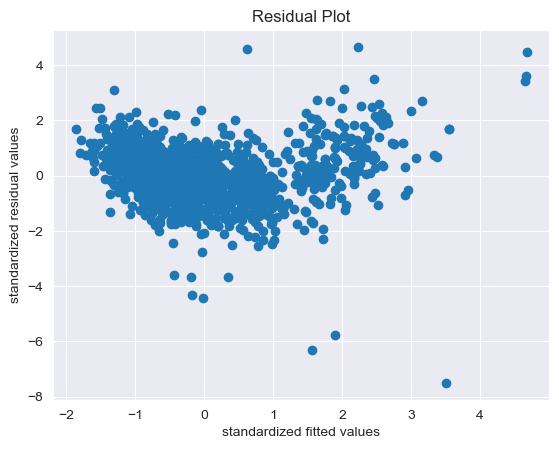

In [28]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

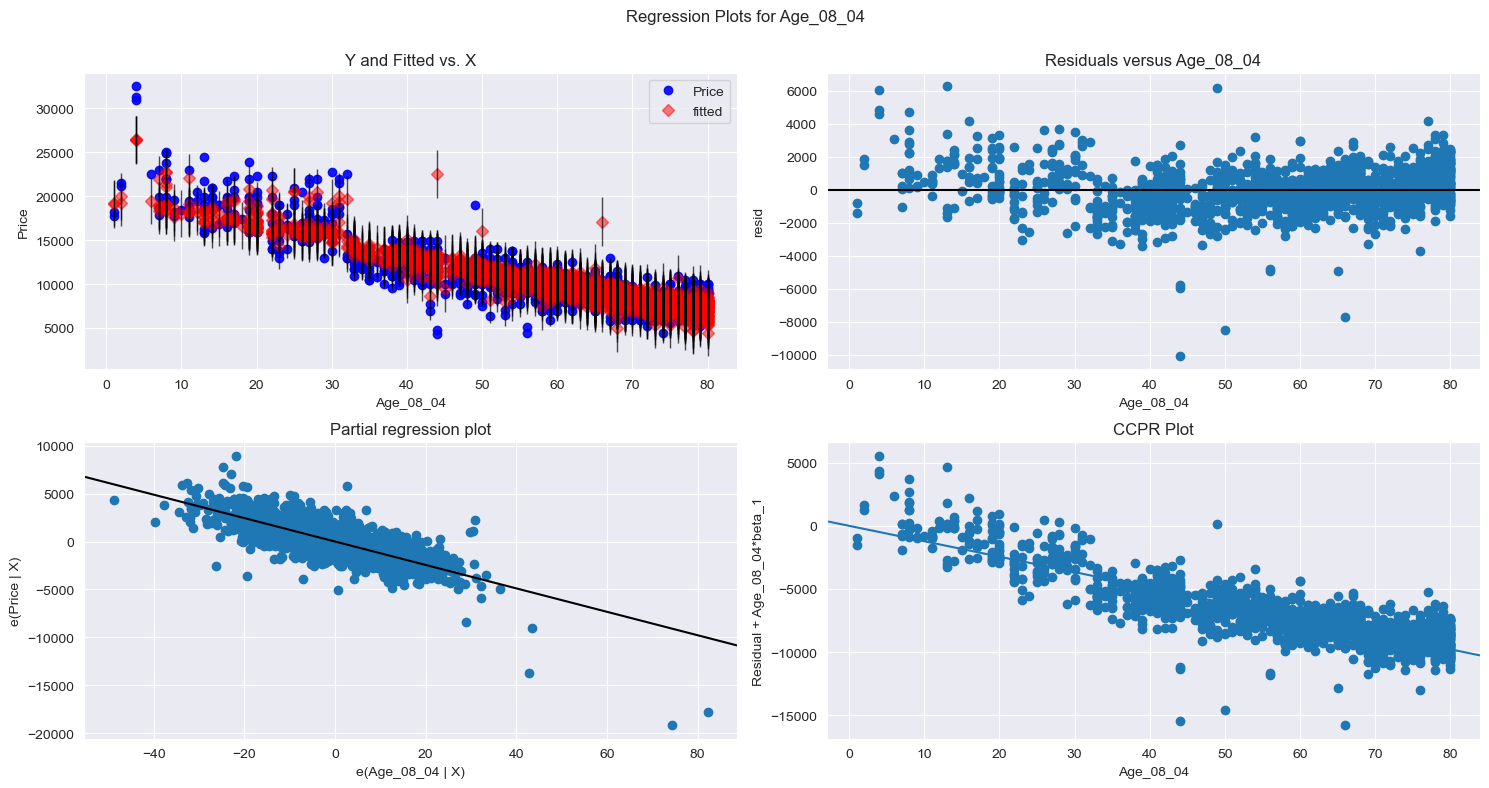

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)
plt.show()


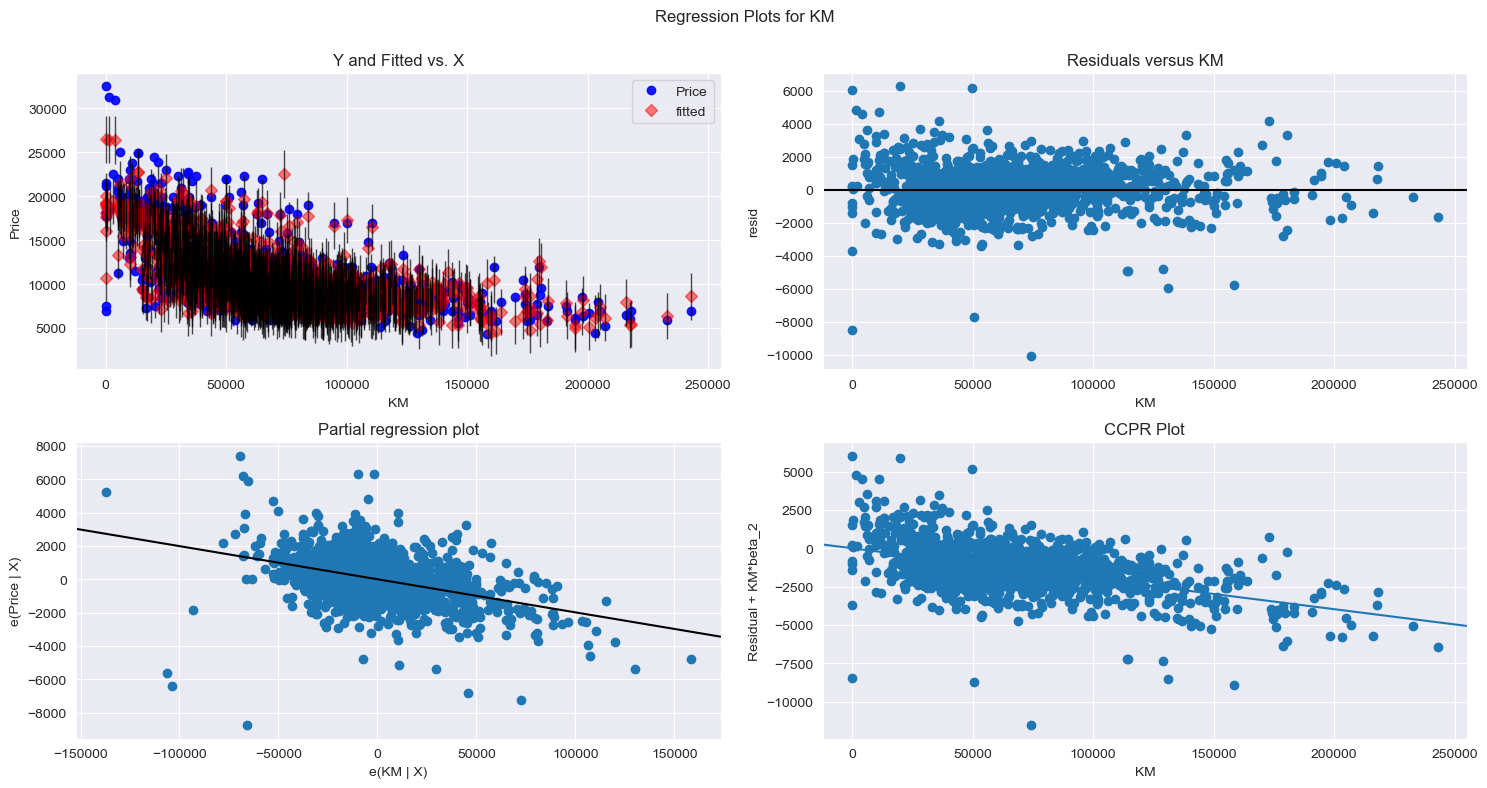

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

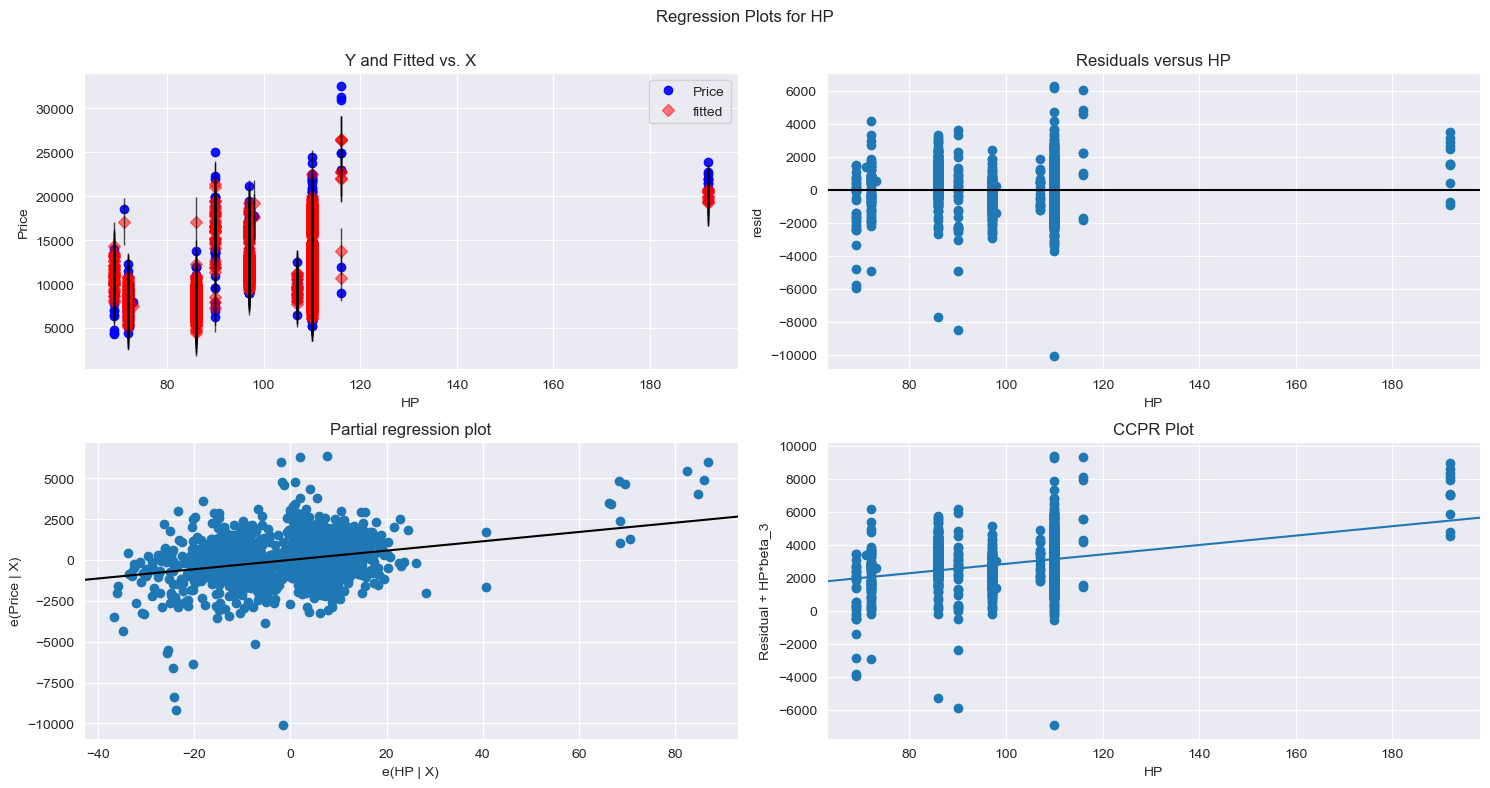

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

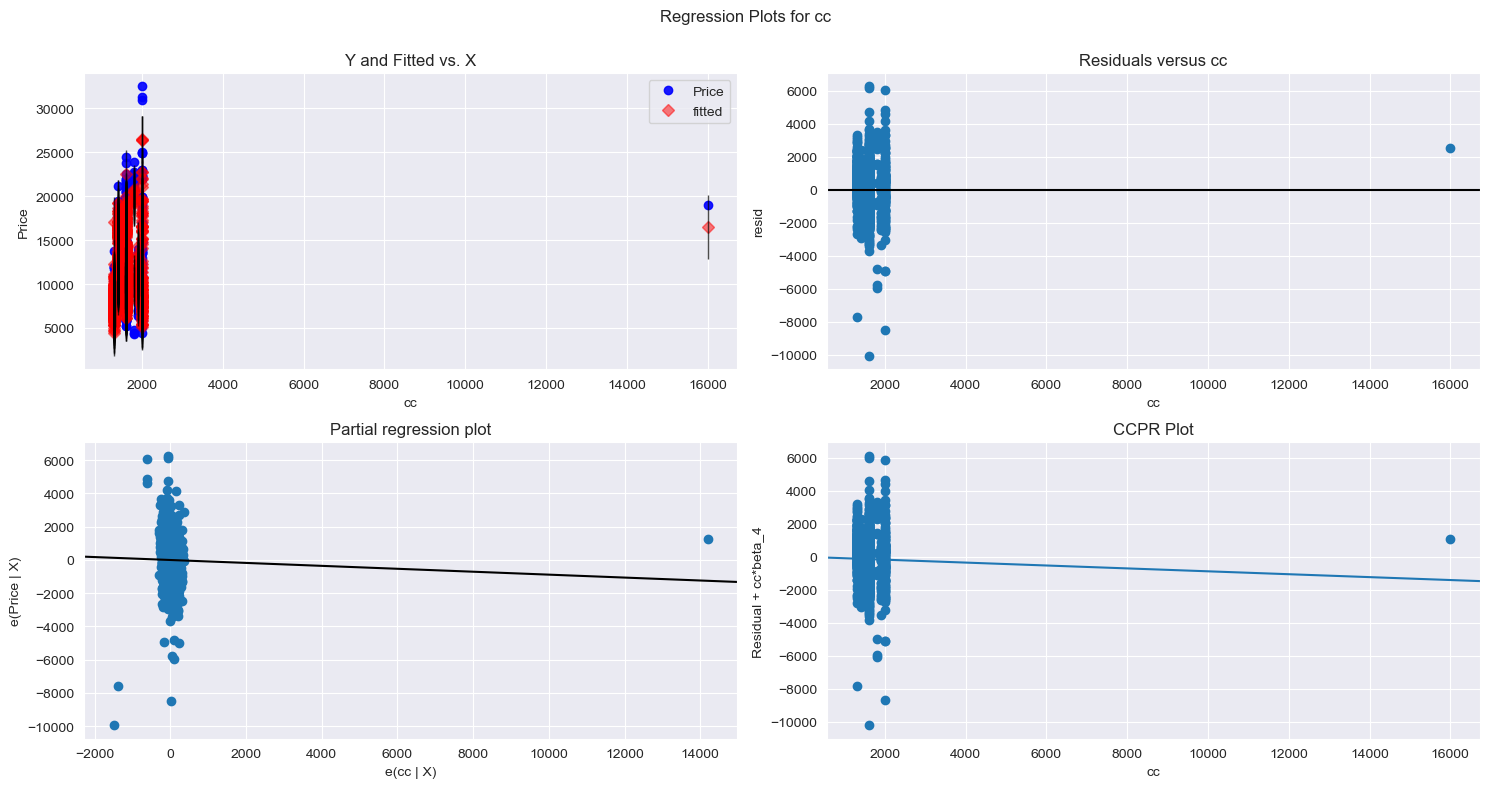

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

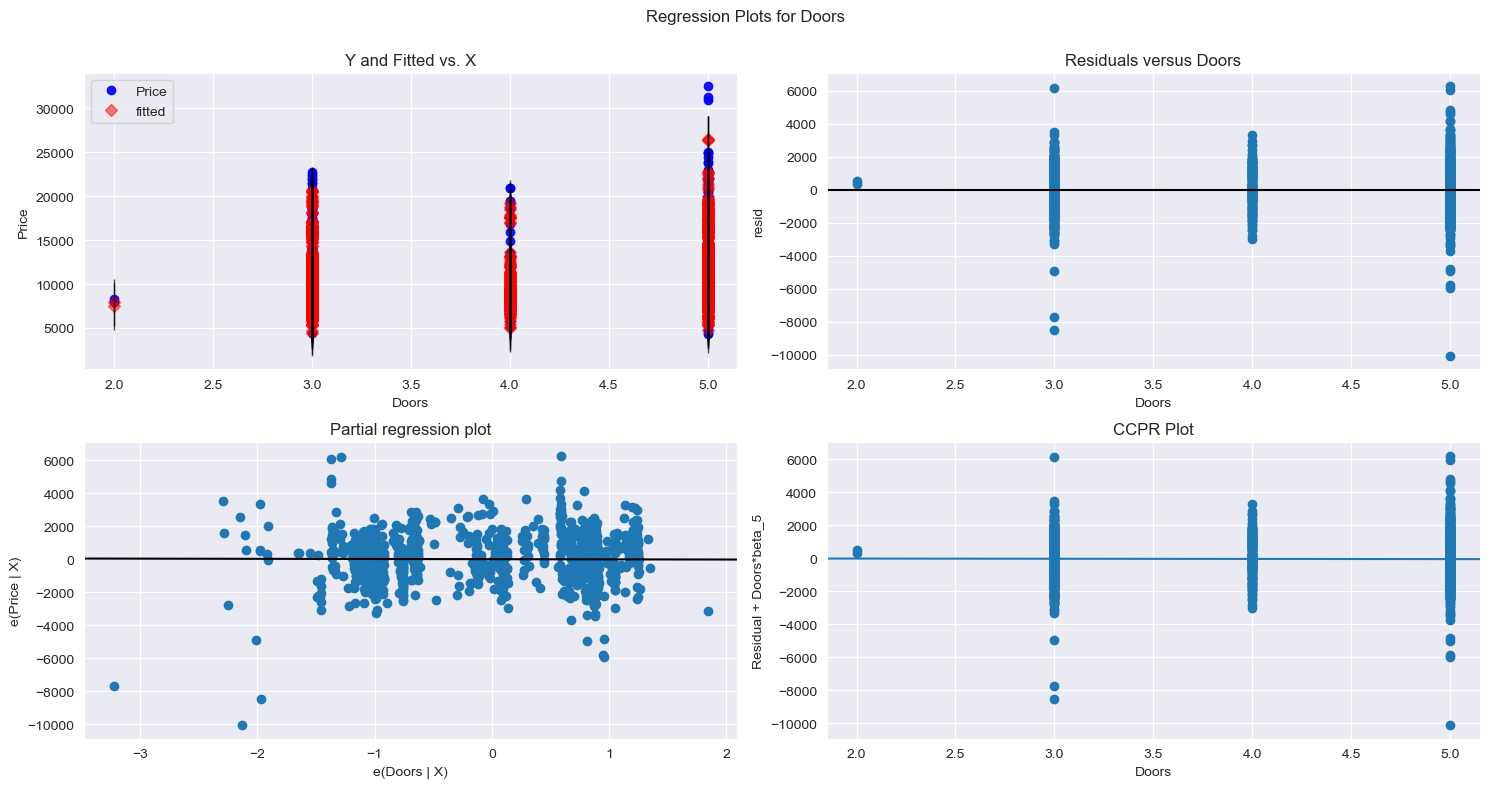

In [33]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

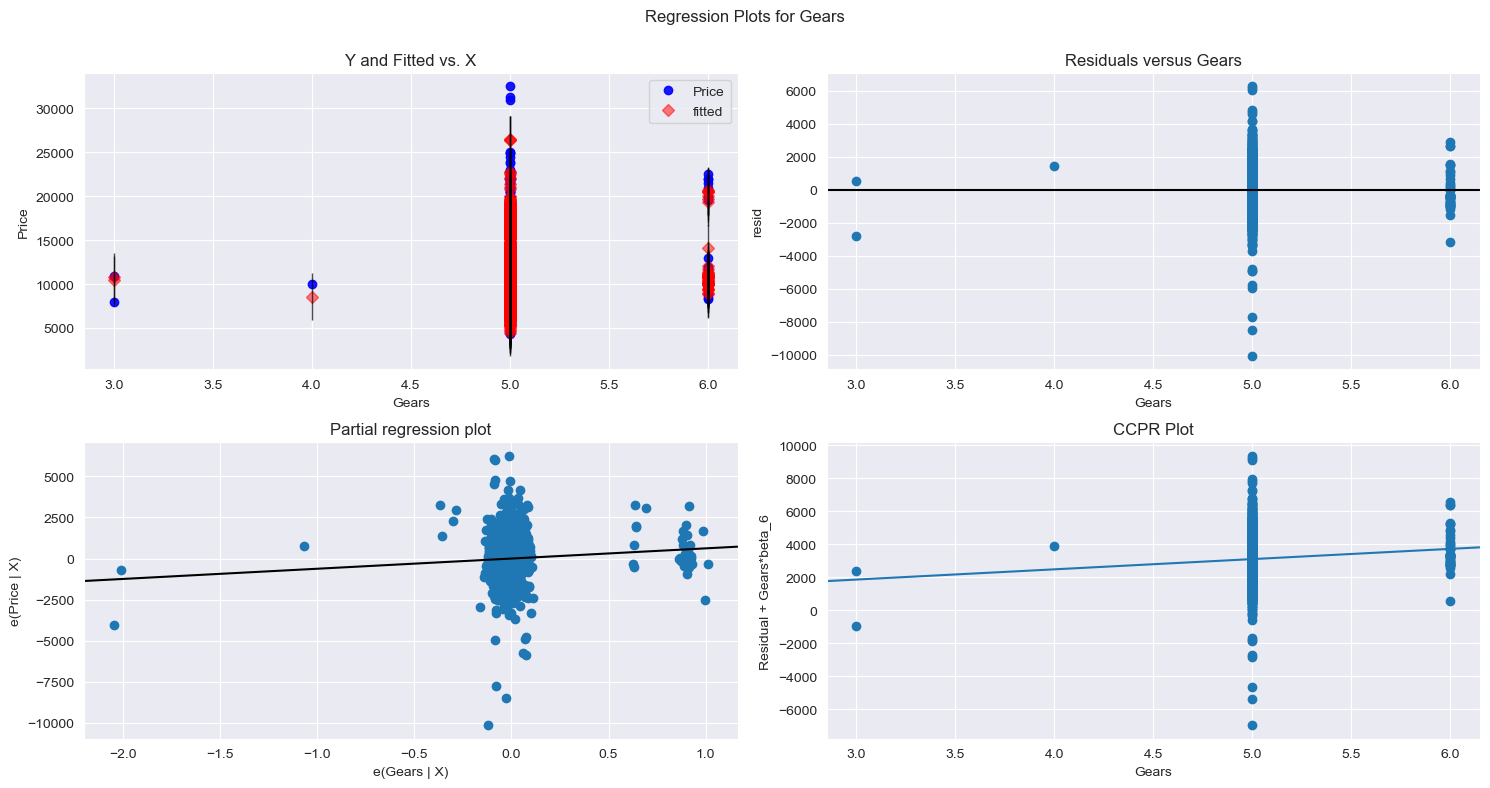

In [34]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

In [135]:
#fig = plt.figure(figsize=(15, 8))
#sm.graphics.plot_regress_exog(model, 'Cylinders', fig=fig)
#plt.show()




In [137]:
toyota['Cylinders'].dtype


dtype('int64')

In [127]:
 toyota['Cylinders'].describe()

count    1436.0
mean        4.0
std         0.0
min         4.0
25%         4.0
50%         4.0
75%         4.0
max         4.0
Name: Cylinders, dtype: float64

In [133]:
toyota['Cylinders'].isnull().sum()
toyota['Cylinders'].nunique()

1

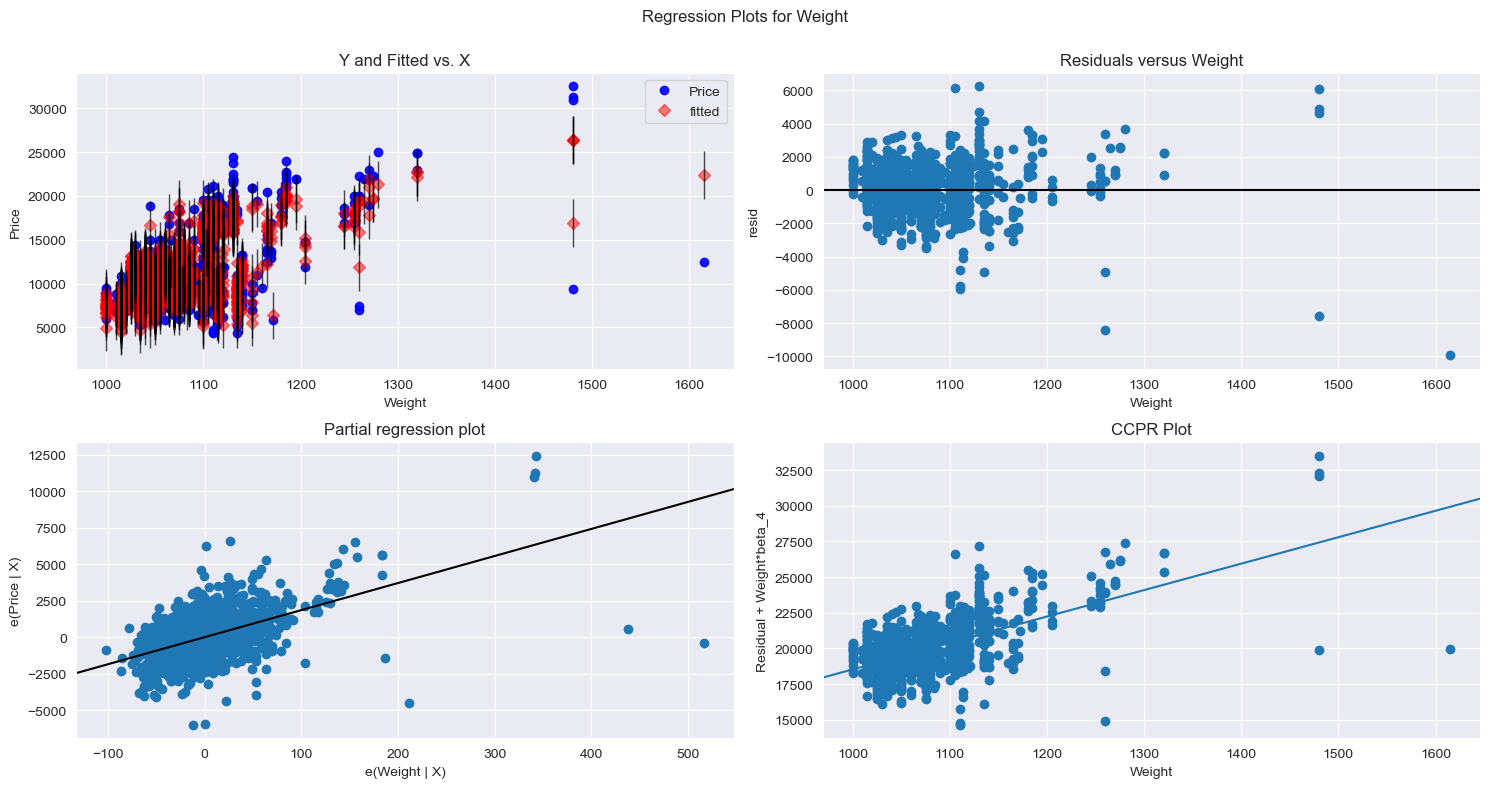

In [62]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [81]:
(c,_)=model.get_influence().cooks_distance
c

array([4.65612171e-03, 2.75310869e-03, 3.34769910e-03, ...,
       1.16629428e-05, 9.92250611e-04, 1.62225890e-02])

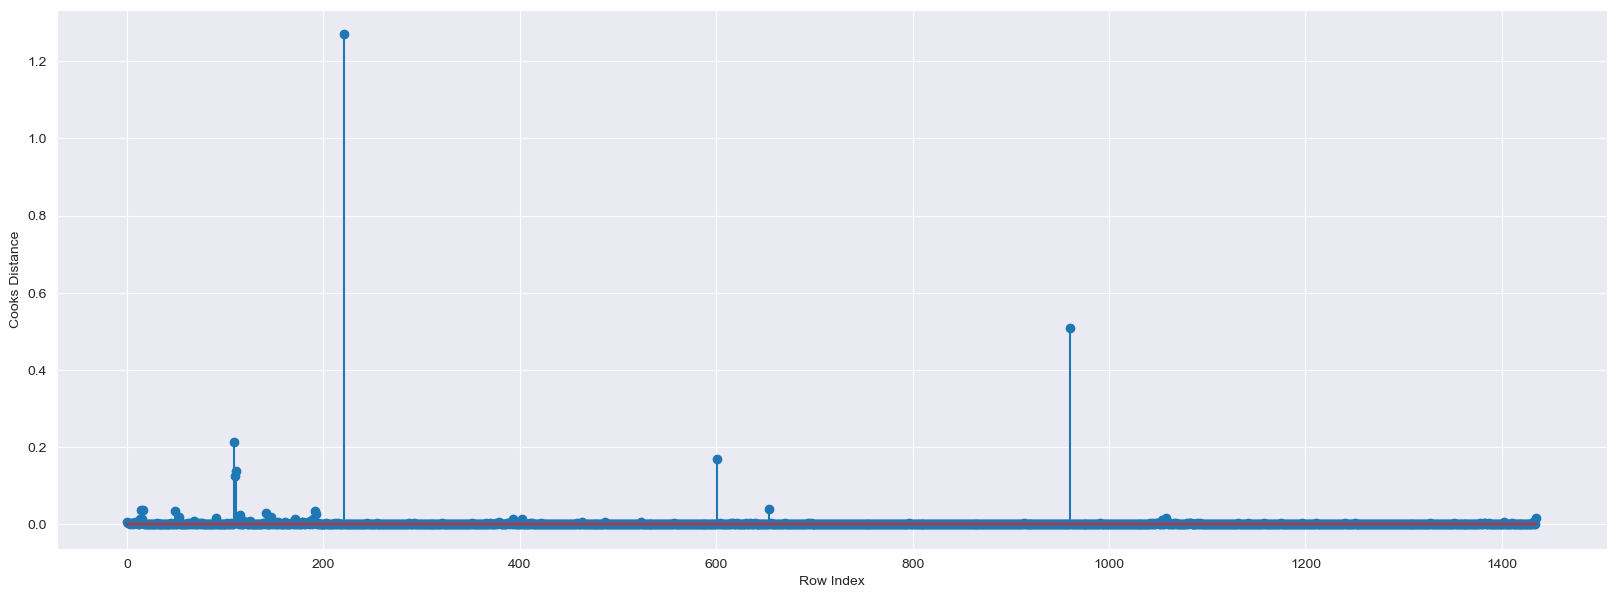

In [83]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
np.argmax(c) , np.max(c)

In [ ]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [85]:
k=toyota.shape[1]
n=toyota.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.027158774373259052

In [87]:
toyota[toyota.index.isin([80])] 

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
80,18950,25,20019,110,1,16000,5,4,5,1180,False,True


In [89]:
toyota_new=toyota.copy()
toyota_new

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [91]:
toyota1=toyota_new.drop(toyota_new.index[[80]],axis=0).reset_index(drop=True)
toyota1

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1431,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1432,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1433,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [93]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Cylinders+Weight',data=toyota1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota1=toyota1.drop(toyota1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota1
else:
    final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Cylinders+Weight',data=toyota1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8888522335939621


In [95]:
final_model.rsquared

0.8888522335939621

In [97]:
toyota1

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1428,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1429,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1430,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [99]:
new_data=pd.DataFrame({'Age_08_04':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"Cylinders":69,"Weight":1012},index=[0])
new_data

,Age_08_04,KM,HP,cc,Doors,Gears,Cylinders,Weight
0,12,40000,80,1300,4,5,69,1012


In [101]:
final_model.predict(new_data)

0   -254620.52119
dtype: float64

In [103]:
pred_y=final_model.predict(toyota1)
pred_y


0       16203.650332
1       15751.498954
2       16185.102666
3       15854.616826
4       15746.374456
            ...     
1427     9132.572355
1428     8491.991042
1429     8637.014252
1430     8749.212015
1431    11124.177303
Length: 1432, dtype: float64

**INTERVIEW QUESTIONS :**

1. **What is Normalization & Standardization and how is it helpful?**

   - **Normalization** scales data to a fixed range   
     
   - **Standardization** transforms data to have a mean of 0 and a standard deviation of 1  
       
   - These techniques improve model performance by ensuring all features contribute equally, preventing dominance by large-scale variables. They are crucial for models like KNN, regression, and neural networks.  


  
2. **What techniques can be used to address multicollinearity in multiple linear regression?**

 - **Variance Inflation Factor (VIF):** Identifies highly correlated variables (VIF > 5 or 10) for removal.  
   - **Feature Selection:** Removing or combining highly correlated features using a correlation matrix.  
   - **Regularization (Lasso/Ridge Regression):** Shrinks coefficients to reduce multicollinearity.  
   - **Principal Component Analysis (PCA):** Reduces dimensions while retaining key information.  
   - **Collecting More Data:** Helps differentiate variable relationships.  
   - **Combining Features:** Creating new meaningful features (e.g., using BMI instead of height and weight separately).  

These methods enhance model stability and improve interpretability.